In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, mean_squared_error

In [ ]:
# Sample data
data = {
    'ID': [1, 2],
    'CODE_GENDER': ['M', 'F'],
    'FLAG_OWN_CAR': ['Y', 'N'],
    'FLAG_OWN_REALTY': ['Y', 'N'],
    'CNT_CHILDREN': [2, 1],
    'AMT_INCOME_TOTAL': [50000, 60000],
    'NAME_INCOME_TYPE': ['Working', 'Commercial associate'],
    'NAME_EDUCATION_TYPE': ['Higher education', 'Secondary / secondary special'],
    'NAME_FAMILY_STATUS': ['Married', 'Single / not married'],
    'DAYS_BIRTH': [-10000, -12000],
    'DAYS_EMPLOYED': [-5000, 365243],
    'FLAG_MOBIL': [1, 1],
    'FLAG_WORK_PHONE': [1, 0],
    'FLAG_PHONE': [1, 0],
    'FLAG_EMAIL': [1, 0],
    'OCCUPATION_TYPE': ['Managers', 'Laborers'],
    'CNT_FAM_MEMBERS': [4, 2],
    'STATUS': ['C', '1']
}

In [ ]:
df = pd.DataFrame(data)
status_meanings = {
    '0': '1-29 days past due',
    '1': '30-59 days past due',
    '2': '60-89 days overdue',
    '3': '90-119 days overdue',
    '4': '120-149 days overdue',
    '5': 'Overdue or bad debts, write-offs for more than 150 days',
    'C': 'Paid off that month',
    'X': 'No loan for the month'
}
df['STATUS_MEANING'] = df['STATUS'].map(status_meanings)
print(df)

   ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0   1           M            Y               Y             2   
1   2           F            N               N             1   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0             50000               Working               Higher education   
1             60000  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  \
0               Married      -10000          -5000           1   
1  Single / not married      -12000         365243           1   

   FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                1           1           1        Managers                4   
1                0           0           0        Laborers                2   

  STATUS       STATUS_MEANING  
0      C  Paid off that month  
1      1  30-59 days past due  


In [ ]:
df['OCCUPATION_TYPE'].fillna(df['OCCUPATION_TYPE'].mode()[0], inplace=True)

<ipython-input-46-af33689bc532>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['OCCUPATION_TYPE'].fillna(df['OCCUPATION_TYPE'].mode()[0], inplace=True)


In [ ]:
categorical_cols = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'OCCUPATION_TYPE']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [ ]:
X = df.drop('STATUS', axis=1)
y = df['STATUS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
numerical_cols = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS']
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# **Visualization**

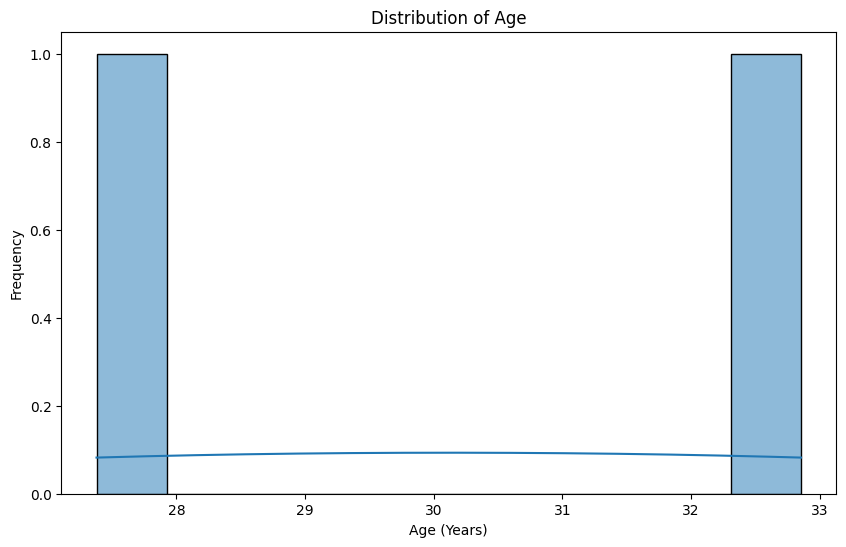

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df['AGE_YEARS'] = -df['DAYS_BIRTH'] / 365.25

plt.figure(figsize=(10, 6))
sns.histplot(df['AGE_YEARS'], bins=10, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age (Years)')
plt.ylabel('Frequency')
plt.show()

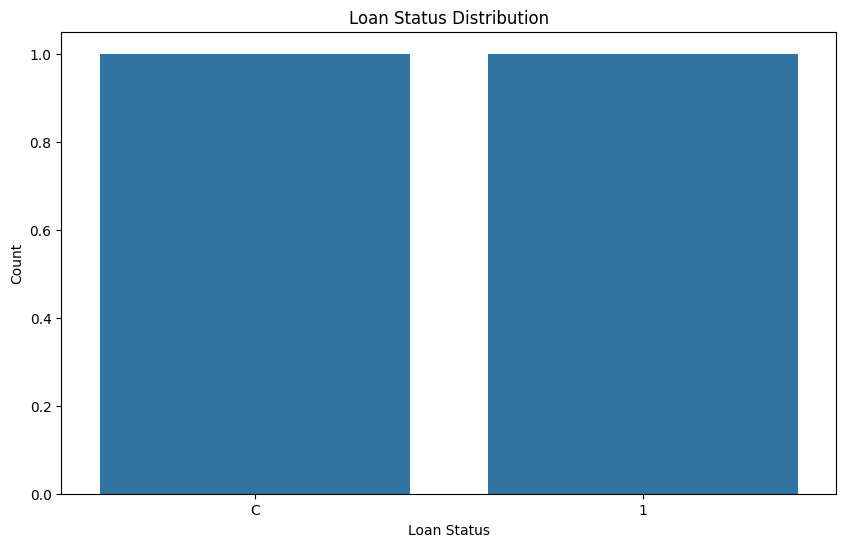

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='STATUS', data=df, order=df['STATUS'].value_counts().index)
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

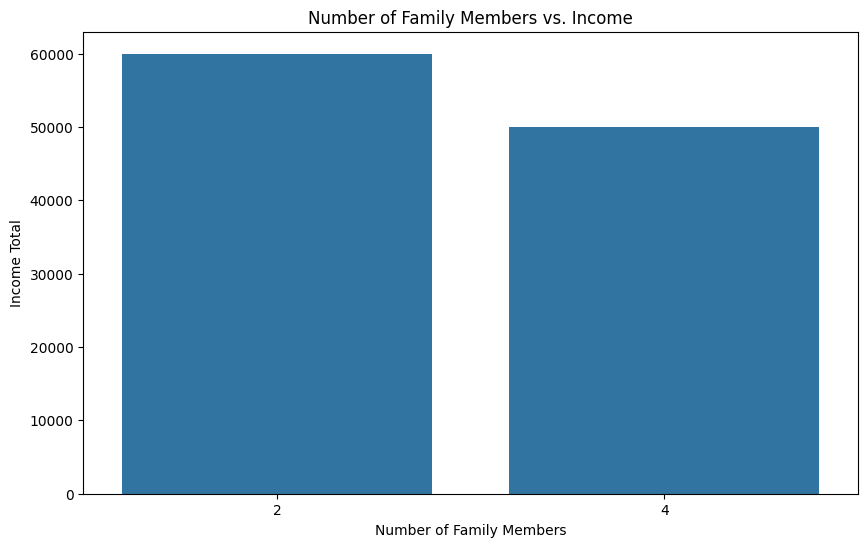

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='CNT_FAM_MEMBERS', y='AMT_INCOME_TOTAL', data=df)
plt.title('Number of Family Members vs. Income')
plt.xlabel('Number of Family Members')
plt.ylabel('Income Total')
plt.show()

# **Linear Regression:**

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Linear Regression MSE: {mse}")


Linear Regression MSE: 1.0


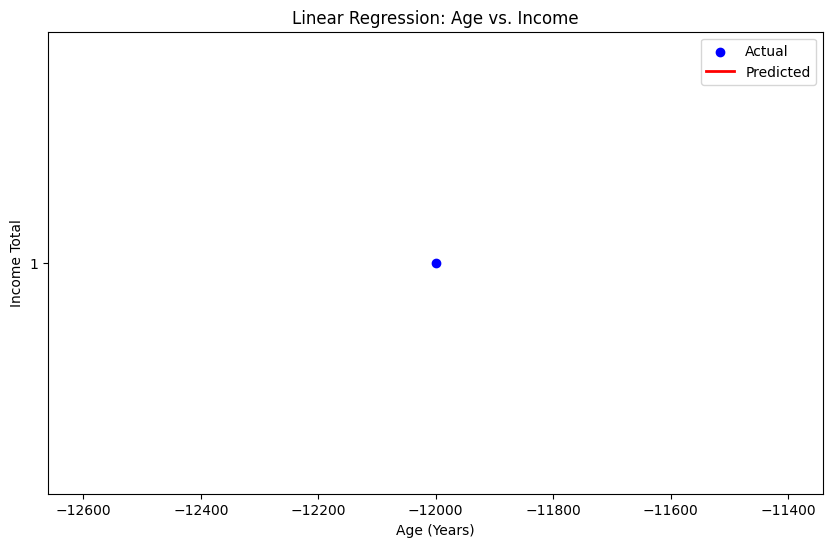

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
# Select a specific column from X_test for the x-axis, for example 'DAYS_BIRTH'
plt.scatter(X_test['DAYS_BIRTH'], y_test, color='blue', label='Actual')
plt.plot(X_test['DAYS_BIRTH'], y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Linear Regression: Age vs. Income')
plt.xlabel('Age (Years)')
plt.ylabel('Income Total')
plt.legend()
plt.show()

# **K-Nearest Neighbors(KNN):**

In [ ]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {accuracy}")

KNN Accuracy: 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


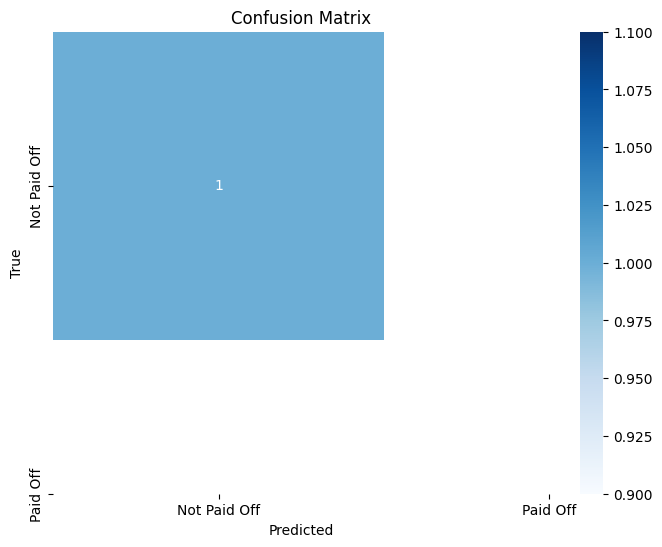

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix # Import the confusion_matrix function
# Convert y_pred to the same type as y_test (string)
y_pred = y_pred.astype(int).astype(str)

# Now, calculate the confusion matrix:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Paid Off', 'Paid Off'], yticklabels=['Not Paid Off', 'Paid Off'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# **Polynomial Regrission:**

In [ ]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
model = LinearRegression()
model.fit(X_train_poly, y_train_encoded)
y_pred = model.predict(X_test_poly)
y_pred_decoded = le.inverse_transform(y_pred.astype(int))
mse = mean_squared_error(y_test_encoded, y_pred.astype(int))
print(f"Polynomial Regression MSE: {mse}")

Polynomial Regression MSE: 1.0


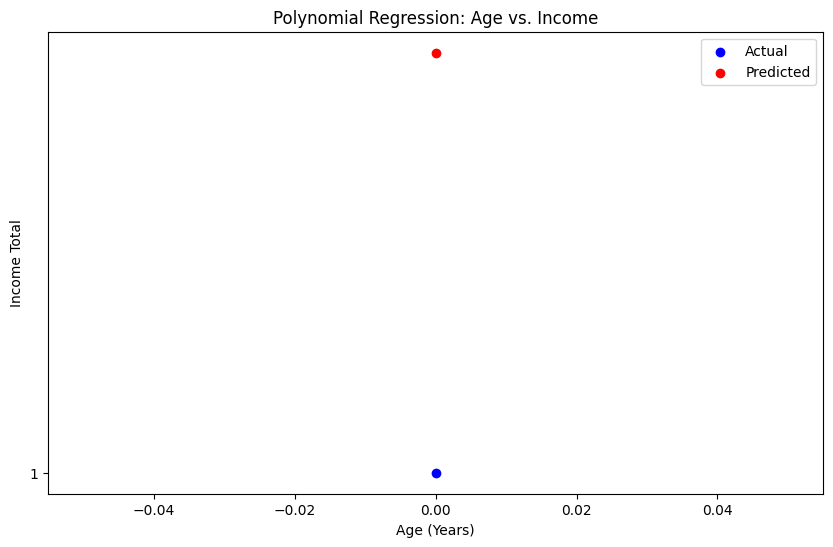

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(X_test.iloc[:, 1], y_test, color='blue', label='Actual')
plt.scatter(X_test.iloc[:, 1], y_pred, color='red', label='Predicted')
plt.title('Polynomial Regression: Age vs. Income')
plt.xlabel('Age (Years)')
plt.ylabel('Income Total')
plt.legend()
plt.show()